In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# generate citites list 

In [2]:
# List for holding lat_lngs and cities

lat_lngs = []
cities = []

# Create a set of random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

264

# API Calling

In [3]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1

Beginning Data Retrieval     
-----------------------------


In [4]:
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | puerto ayora
Processing Record 3 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | ancud
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 1 | dawlatabad
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | portland
Processing Record 13 of Set 1 | qandahar
City not found. Skipping...
Processing Record 14 of Set 1 | chokurdakh
Processing Record 15 of Set 1 | matagami
Processing Record 16 of Set 1 | saskylakh
Processing Record 17 of Set 1 | hailey
Processing Record 18 of Set 1 | plettenberg bay
Processing Record 19 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 20 of Set 1 | havre-saint-pierre
Processing Record 21 of Set 1 | yell

Processing Record 37 of Set 4 | kieta
Processing Record 38 of Set 4 | la ronge
Processing Record 39 of Set 4 | palmer
Processing Record 40 of Set 4 | cherskiy
Processing Record 41 of Set 4 | norman wells
Processing Record 42 of Set 4 | teseney
Processing Record 43 of Set 4 | conde
Processing Record 44 of Set 4 | coetupo
City not found. Skipping...
Processing Record 45 of Set 4 | faanui
Processing Record 46 of Set 4 | alcudia
Processing Record 47 of Set 4 | bomet
Processing Record 48 of Set 4 | ibotirama
Processing Record 49 of Set 4 | mar del plata
Processing Record 0 of Set 5 | erenhot
Processing Record 1 of Set 5 | puerto plata
Processing Record 2 of Set 5 | kaitangata
Processing Record 3 of Set 5 | upernavik
Processing Record 4 of Set 5 | nizwa
Processing Record 5 of Set 5 | hamilton
Processing Record 6 of Set 5 | todos santos
Processing Record 7 of Set 5 | dryden
Processing Record 8 of Set 5 | spearfish
Processing Record 9 of Set 5 | padang
Processing Record 10 of Set 5 | nouadhibo

In [5]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          242
Lat           242
Lng           242
Max Temp      242
Humidity      242
Cloudiness    242
Wind Speed    242
Country       242
Date          242
dtype: int64

In [6]:
# Display the City Data Frame
city_data_pd.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cape town,-33.9258,18.4232,70.00,52,0,19.57,ZA,1612166505
1,puerto ayora,-0.7393,-90.3518,77.00,92,10,5.01,EC,1612166566
2,mataura,-46.1927,168.8643,63.01,63,14,4.90,NZ,1612166566
3,jamestown,42.0970,-79.2353,26.01,86,90,10.36,US,1612166273
4,ancud,-41.8697,-73.8203,53.01,93,0,6.91,CL,1612166566


# Temperature vs Latitude 

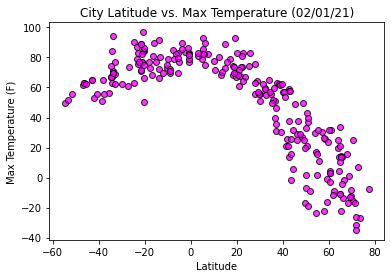

In [7]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", color = "magenta", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(False)

# Show plot
plt.show()

# Humidity vs Latitude 

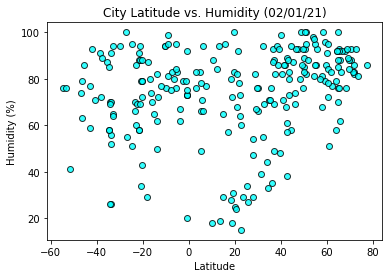

In [8]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", color ="cyan", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(False)


# Show plot
plt.show()

# Cloudiness vs Latitude 

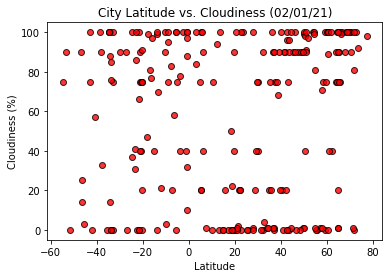

In [9]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", color = "red", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(False)


# Show plot
plt.show()

# Wind Speed vs Latitude 

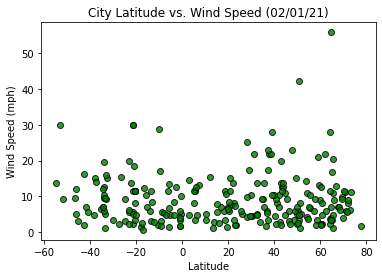

In [10]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", color ="green", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(False)


# Show plot
plt.show()
